# 2*2 Pixel Projection to 3D bloch sphere

In [127]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, BasicAer, IBMQ, Aer
from qiskit import transpile, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from math import pi
from PIL import Image

In [128]:
import os 
os.path.abspath('')

'c:\\Users\\HCI\\Desktop\\Stereo'

In [132]:
path_img_2 = 'pixel2.png'
path_img_2 = os.path.join(os.path.abspath(''),
                            path_img_2)
print(path_img_2)

c:\Users\HCI\Desktop\Stereo\pixel2.png


In [134]:
def projection(pix_proj, r, h_img, w_img, h_proj, w_proj):

    (row, col) = pix_proj

    x = row
    y = col
    z = 0
    print("x,y,z = ",x,y,z)
    Q = np.array([x, y, z], dtype=np.float32)

    P = get_point_on_sphere(Q, r)
    
    return P


def get_point_on_sphere(point,r):

    [x, y, z] = point
    k = 2 * r**2 / (x**2 + y**2 + r**2)
    print("k = ", k)
    return np.array([k * x, k * y, (k - 1) * r]) / np.sqrt((k * x)**2 + (k * y)**2 + ((k-1)*r)**2)

In [135]:
def Statevec(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)

    a = np.cos(theta/2)
    b = complex(np.sin(phi),np.sin(phi))*np.sin(theta/2)

    return Statevector([a,b])

In [111]:
img = np.array(Image.open(path_img_2))

h_img = img.shape[0]
w_img = img.shape[1]
h_proj_2 = 2
w_proj_2 = 2
r = 1

x = 0.5

proj_2 = np.array([[x,x,0],
                 [-x,x,0],
                 [-x,-x,0],
                 [x,-x,0]])


x,y,z =  0.5 0.5 0
k =  1.3333333333333333
x,y,z =  -0.5 0.5 0
k =  1.3333333333333333
x,y,z =  -0.5 -0.5 0
k =  1.3333333333333333
x,y,z =  0.5 -0.5 0
k =  1.3333333333333333
point_2d =  [array([0.5, 0.5, 0. ]), array([-0.5,  0.5,  0. ]), array([-0.5, -0.5,  0. ]), array([ 0.5, -0.5,  0. ])]
point_3d =  [array([0.66666667, 0.66666667, 0.33333333]), array([-0.66666667,  0.66666667,  0.33333333]), array([-0.66666667, -0.66666667,  0.33333333]), array([ 0.66666667, -0.66666667,  0.33333333])]


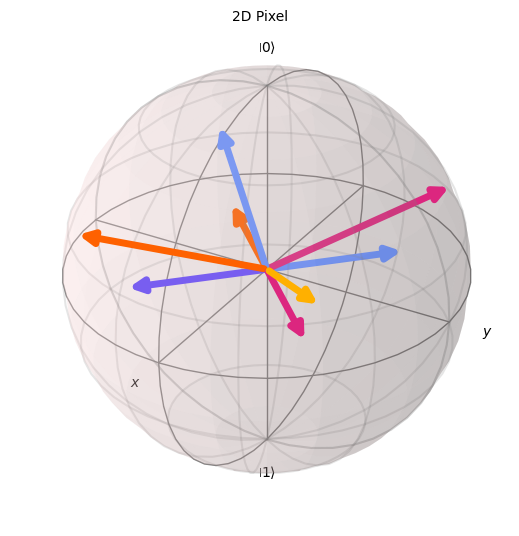

In [112]:
point_2d = []
point_3d = []

for i in proj_2:
    sphere = projection(i[:2], r, h_img, w_img, h_proj_2, w_proj_2)
    point_2d.append(i)    
    point_3d.append(sphere)

print('point_2d = ', point_2d)
print('point_3d = ', point_3d)


plot_bloch_vector(point_2d+point_3d, title='2D Pixel')
#plot_bloch_vector(point_3d, title='3D projection')

# sphere 는 np.ndarray 이고, point_3d는 list이다. append(sphere) 로 np.ndarray를 list에 추가,
# point_3d는 array를 포함하는 list


In [113]:
def Statevec(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)

    a = np.cos(theta/2)
    b = complex(np.sin(phi),np.sin(phi))*np.sin(theta/2)

    return Statevector([a,b])


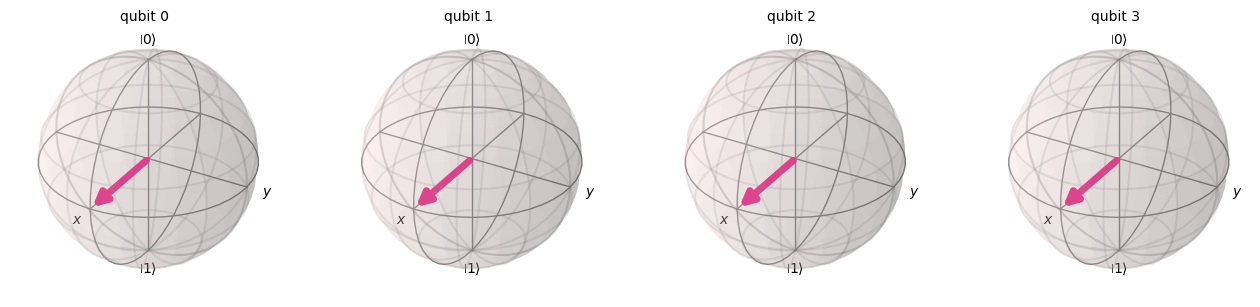

In [114]:
qc= QuantumCircuit(4,1)

qc.h(range(4))

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

In [115]:
path_img_3 = 'pixel2.png'
path_img_3 = os.path.join(os.path.abspath(''),
                            path_img_3)
print(path_img_3)

img_3 = np.array(Image.open(path_img_3))

h_img_3 = img_3.shape[0]
w_img_3 = img_3.shape[1]
h_proj_3 = 3
w_proj_3 = 3
r = 1

x = 0.3

proj_3 = np.array([[-x,x,0],[0,x,0],[x,x,0],
                   [-x,0,0],[0,0,0],[x,0,0],
                 [-x,-x,0],[0,-x,0],[x,-x,0]])


c:\Users\HCI\Desktop\Stereo\pixel2.png


x,y,z =  -0.3 0.3 0
k =  1.6949152336898665
x,y,z =  0.0 0.3 0
k =  1.8348623732807718
x,y,z =  0.3 0.3 0
k =  1.6949152336898665
x,y,z =  -0.3 0.0 0
k =  1.8348623732807718
x,y,z =  0.0 0.0 0
k =  2.0
x,y,z =  0.3 0.0 0
k =  1.8348623732807718
x,y,z =  -0.3 -0.3 0
k =  1.6949152336898665
x,y,z =  0.0 -0.3 0
k =  1.8348623732807718
x,y,z =  0.3 -0.3 0
k =  1.6949152336898665
point_2d =  [array([-0.3,  0.3,  0. ]), array([0. , 0.3, 0. ]), array([0.3, 0.3, 0. ]), array([-0.3,  0. ,  0. ]), array([0., 0., 0.]), array([0.3, 0. , 0. ]), array([-0.3, -0.3,  0. ]), array([ 0. , -0.3,  0. ]), array([ 0.3, -0.3,  0. ])]
point_3d =  [array([-0.50847459,  0.50847459,  0.69491523]), array([0.        , 0.55045873, 0.83486237]), array([0.50847459, 0.50847459, 0.69491523]), array([-0.55045873,  0.        ,  0.83486237]), array([0., 0., 1.]), array([0.55045873, 0.        , 0.83486237]), array([-0.50847459, -0.50847459,  0.69491523]), array([ 0.        , -0.55045873,  0.83486237]), array([ 0.50847459, 

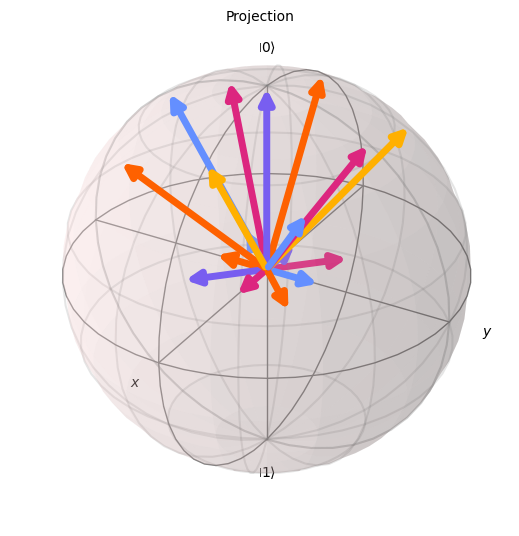

In [116]:
point_2d_3 = []
point_3d_3 = []

for i in proj_3:
    sphere = projection(i[:2], r, h_img, w_img, h_proj_3, w_proj_3)
    point_2d_3.append(i)    
    point_3d_3.append(sphere)

print('point_2d = ', point_2d_3)
print('point_3d = ', point_3d_3)


plot_bloch_vector(point_2d_3+point_3d_3, title='Projection')
#plot_bloch_vector(point_3d, title='3D projection')

# sphere 는 np.ndarray 이고, point_3d는 list이다. append(sphere) 로 np.ndarray를 list에 추가,
# point_3d는 array를 포함하는 list

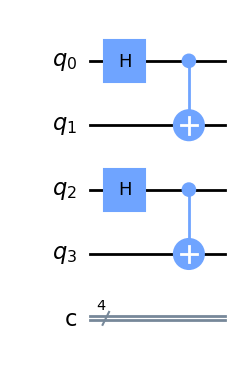

In [120]:
qc = QuantumCircuit(4,4)
qc.h(0)
qc.cx(0,1)
qc.h(2)
qc.cx(2,3)
qc.draw('mpl')

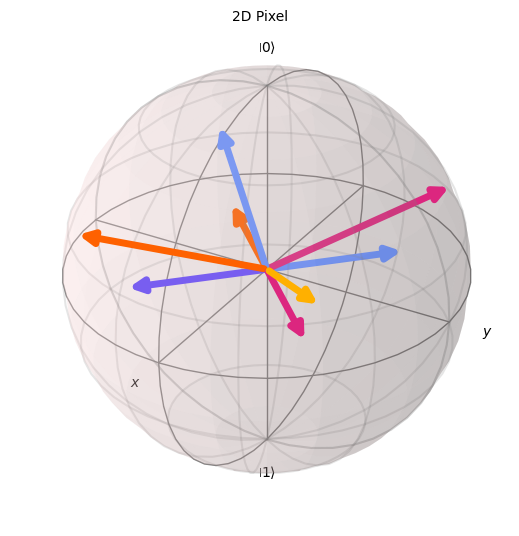

In [121]:
plot_bloch_vector(point_2d+point_3d, title='2D Pixel')

In [140]:
path_img_1 = 'pixel1.png'
path_img_1 = os.path.join(os.path.abspath(''),
                            path_img_1)
print(path_img_1)

c:\Users\HCI\Desktop\Stereo\pixel1.png


In [142]:
img1 = np.array(Image.open(path_img_1))
print(img1.shape)
h_img = img1.shape[0]
w_img = img1.shape[1]
h_proj_2 = 1
w_proj_2 = 1
r = 1

x = 0.5

proj_2 = np.array([[x,0,0]])

(1, 1, 3)


x,y,z =  0.5 0.0 0
k =  1.6
point_2d =  [array([0.5, 0. , 0. ])]
point_3d =  [array([0.8, 0. , 0.6])]
[array([0.5, 0. , 0. ]), array([0.8, 0. , 0.6])]


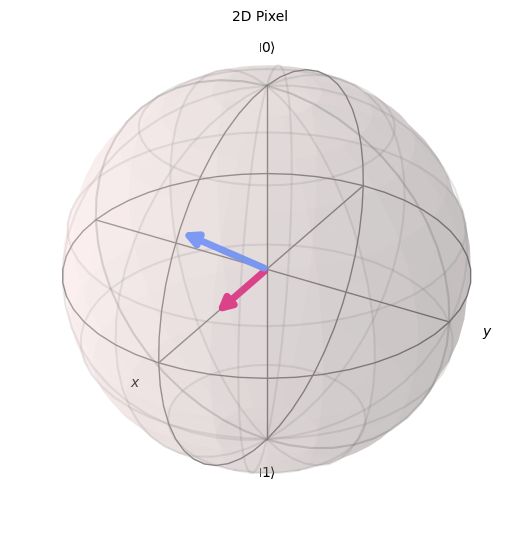

In [164]:
point_2d = []
point_3d = []

for i in proj_2:
    sphere = projection(i[:2], r, h_img, w_img, h_proj_2, w_proj_2)
    point_2d.append(i)    
    point_3d.append(sphere)

print('point_2d = ', point_2d)
print('point_3d = ', point_3d)
print(point_2d+point_3d)

plot_bloch_vector(point_2d+point_3d, title='2D Pixel')
#plot_bloch_vector(point_3d, title='3D projection')

# sphere 는 np.ndarray 이고, point_3d는 list이다. append(sphere) 로 np.ndarray를 list에 추가,
# point_3d는 array를 포함하는 list

# 1 X 1 Pixel Stereographic Projection

In [23]:
import numpy as np
from math import pi
import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector

In [168]:
Q = np.array([0.5,0.5,0])

x , y = Q[:2]

print("x' = ", x,", y' = ", y)

def get_point_on_sphere(point):

    x, y, z = point

    k = round( 2 / (x**2 + y**2 + 1), 4)

    size = np.sqrt((k * x)**2 + (k * y)**2 + ((k-1))**2)

    print("k = ", k)

    return np.array([k * x, k * y, (k - 1)] / size ) 

def projection(pix):

    x,y,z = pix
    print("x,y,z = ",x,y,z)
    Q = np.array([x,y,z])

    P = get_point_on_sphere(Q)
    print("Q = ", pix, ", P = ", P)
    return P


x' =  0.5 , y' =  0.5


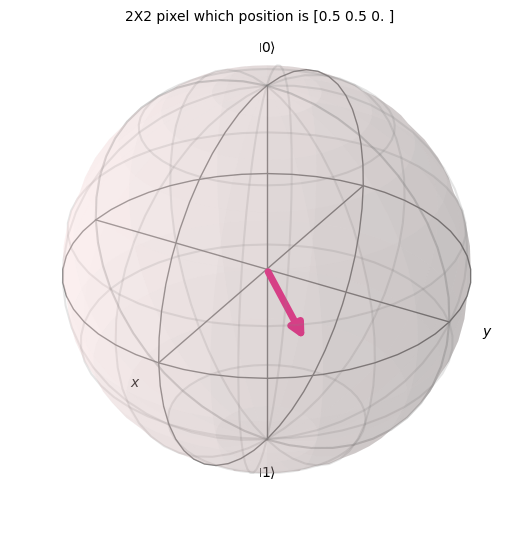

In [169]:
plot_bloch_vector(Q, title = f'2X2 pixel which position is {Q}')

In [170]:
P_3D = projection(Q)

x,y,z =  0.5 0.5 0.0
k =  1.3333
Q =  [0.5 0.5 0. ] , P =  [0.66667222 0.66667222 0.33331111]


In [171]:
P_3D

array([0.66667222, 0.66667222, 0.33331111])

Q and P position is  [0.66667222 0.66667222 0.33331111]


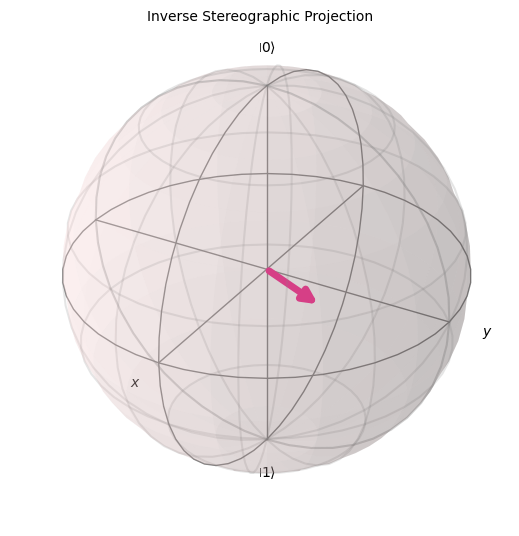

In [172]:
print("Q and P position is ", P_3D)
plot_bloch_vector(P_3D, title='Inverse Stereographic Projection')

In [173]:
def InverseProjection(P):

    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)

    x_proj = round((np.cos(phi)/ np.tan(pi/2-theta/2)),4)
    y_proj = round((np.sin(phi)/ np.tan(pi/2-theta/2)),4)
    z_proj = 0

    a = np.cos(theta/2)
    b = complex(np.cos(phi),np.sin(phi))*np.sin(theta/2)
    print("( x_proj, y_proj, z_proj ) = ", (x_proj, y_proj, z_proj))
    return plot_bloch_vector([x_proj, y_proj, z_proj], title = "Stereographic Projection")


( x_proj, y_proj, z_proj ) =  (0.5, -0.5, 0)


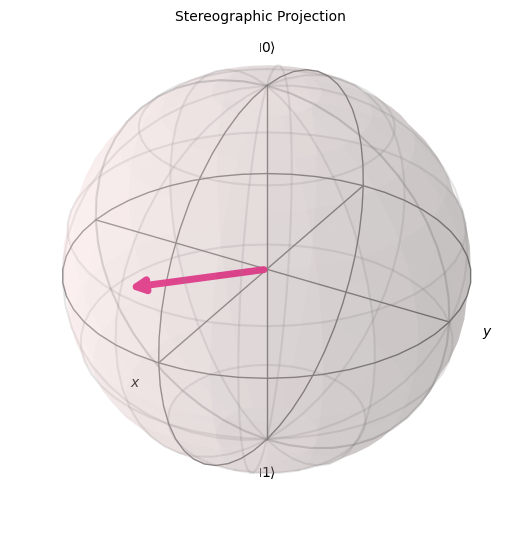

In [163]:
InverseProjection(P_3D)

# 1 x 1 Pixel Projection with QuantumCircuit

## Represent 1 X 1 Pixel with QuantumCircuit using Hadamard Gate and Rotation Gate

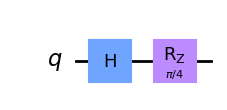

In [128]:
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.rz(pi/4,0)
qc1.draw('mpl')

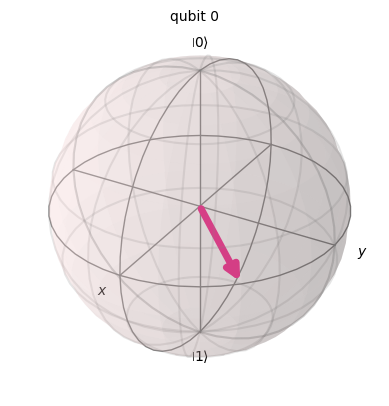

In [129]:
state = Statevector.from_instruction(qc1)
plot_bloch_multivector(state)

## Resize 1 X 1 Pixel and Represent 1 X 1 Pixel Again

Previous state =  Statevector([0.65328148-0.27059805j, 0.65328148+0.27059805j],
            dims=(2,))
phi =  (0.7853981633974484+0j)
Resized state =  Statevector([0.46193977-0.19134172j, 0.46193977+0.19134172j],
            dims=(2,))


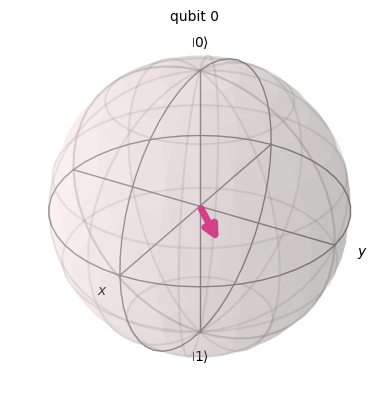

In [164]:
# theta 각도 구해야하는가? 에 대한 고찰
# Quantumcircuit에서 Hadamard Gate를 적용하고 phi_bloch 만큼 회전한 state의 phi_bloch를 구했다.
# 2D image의 경우 theta의 각도가 pi/2 로 고정이므로 Quantum Gate에서 2D image를 3D image로 mapping 하는 과정에서는 구하지 않아도 될 것 같다.

from math import cos, sin
state = Statevector.from_instruction(qc1)

print("Previous state = ", state)
t = 0
for i in range(2):
    t += state[i]
phi_bloch = 2 * np.arccos(np.sqrt(2) * t/2) # Rotation around Z-axis 의 경우 회전 각도의 절반이 exponential의 지수 term으로 들어가므로 마지막에 2배를 해줌.

print("phi = ", phi_bloch )


state = Statevector([state[0]/np.sqrt(2), state[1]/np.sqrt(2)] )

print("Resized state = ", state)

plot_bloch_multivector(state)


In [165]:
x, y = np.real(np.cos(phi_bloch)), np.real(np.sin(phi_bloch))
print("(x, y) = ", x, y)
plot_bloch_vector([x,y,0] / np.sqrt(2) )
Qixel = np.array([x,y,0] / np.sqrt(2))

(x, y) =  0.7071067811865475 0.7071067811865476


x,y,z =  0.49999999999999994 0.5 0.0
k =  1.3333
Q =  [0.5 0.5 0. ] , P =  [0.66667222 0.66667222 0.33331111]


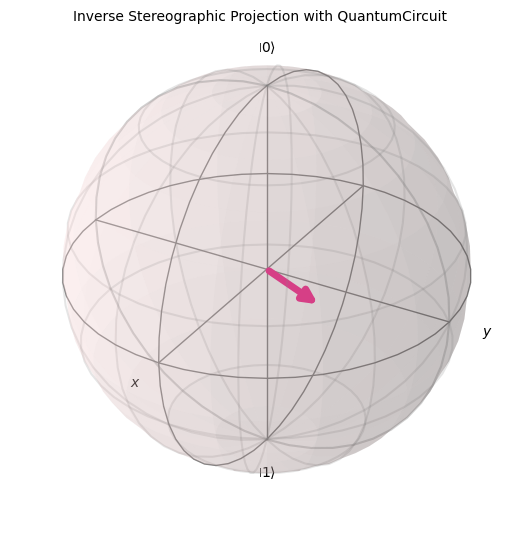

In [167]:
Qroj = projection(Qixel)

plot_bloch_vector(Qroj, title = "Inverse Stereographic Projection with QuantumCircuit")

( x_proj, y_proj, z_proj ) =  (0.5, 0.5, 0)


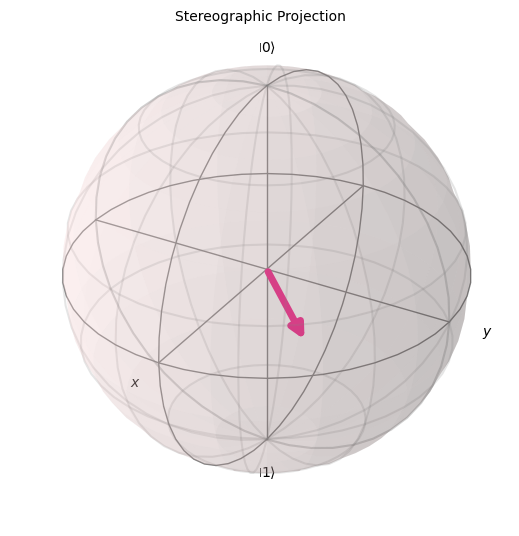

In [177]:
InverseProjection(Qroj)
